<a href="https://colab.research.google.com/github/amzker/Amzux/blob/master/Regression/chapter_0/YT_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
---
$$y = mx + c$$

$$$$
$$m = ∑(Y(i) - Y\_mean) * (X(i) - X\_mean))\over∑((X(i)- X\_mean())^2)$$
$$$$

$$c = Y\_mean - m*X\_mean$$

## Dataset Prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/amzker/ML_Algorithm_From_Scratch/main/Regression/chapter_0/datasets/SLinear.csv")

### Understanding the Dataset

In [3]:
data

,Year,interest rate (%),Median home price
0,1988,10.3,"$183,800"
1,1989,10.3,"$183,200"
2,1990,10.1,"$174,900"
3,1991,9.3,"$173,500"
4,1992,8.4,"$172,900"
5,1993,7.3,"$173,200"
6,1994,8.4,"$173,200"
7,1995,7.9,"$169,700"
8,1996,7.6,"$174,500"
9,1997,7.6,"$177,900"


In [ ]:
data["Median home price"] = data["Median home price"].str.replace("$","").str.replace(",","").astype(int)

In [14]:
data.info()
print(data.describe())
print(data.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               16 non-null     int64  
 1   interest rate (%)  16 non-null     float64
 2   Median home price  16 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 512.0 bytes
              Year  interest rate (%)  Median home price
count    16.000000          16.000000          16.000000
mean   1995.500000           8.056250      204756.250000
std       4.760952           1.352513       51054.114673
min    1988.000000           5.800000      169700.000000
25%    1991.750000           7.225000      173425.000000
50%    1995.500000           7.750000      180550.000000
75%    1999.250000           8.625000      209950.000000
max    2003.000000          10.300000      329800.000000
                       Year  interest rate (%)  Median home price
Year               1.000

<Axes: xlabel='[interest rate (%)]', ylabel='[Median home price]'>

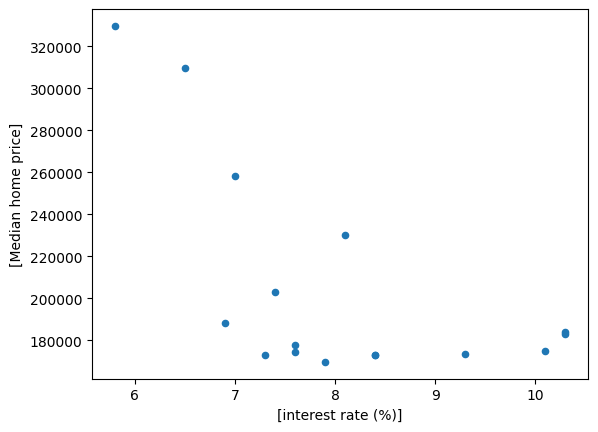

In [9]:
data.plot(kind="scatter",x=["interest rate (%)"],y=["Median home price"])

In [19]:
sx_train = data["interest rate (%)"]
sy_train = data["Median home price"]

### Model

In [21]:
class Linalg:

  def __init__(self):
    self.m = None
    self.c = None
  
  def fit(self,x,y):
    ## Using Cov/varience formula
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    #cv = covarience , xv = x varience 
    cv = np.sum((x - x_mean) * (y - y_mean))
    xv = np.sum(np.square(x-x_mean))
    # no need just if you want to experiment: 
    # yv = np.sum(np.square(y-y_mean))
    
    self.m = cv / xv
    self.c = y_mean - (self.m * x_mean)
  
  def predict(self,x):
    return (self.m * x) + self.c

  def evaluate(self,x,y):
    y_pred = self.predict(x)
    rsq = 1 - (np.sum(np.square(y_pred - y))/np.sum(np.square(y-np.mean(y))))
    print("R square: ",rsq)
  
  def reset(self):
    self.m = None
    self.c = None
  
  def save(self,filename):
    with open(filename,"wb") as f:
      pickle.dump(self,f)

In [22]:
model = Linalg()

In [45]:
model.fit(sx_train,sy_train)
print(model.evaluate(sx_train,sy_train))
model.__dict__

R square:  0.3845951532051971
None


{'m': -23409.448101496477, 'c': 393348.616267681}

In [44]:
from sklearn.linear_model import LinearRegression as LR
sklrmodel = LR()
skx,sky = np.array(sx_train).reshape(-1,1),np.array(sy_train).reshape(-1,1)
sklrmodel.fit(skx,sky)
print("rscore: ",sklrmodel.score(skx,sky))
sklrmodel.__dict__

rscore:  0.3845951532051972


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([[-23409.4481015]]),
 'rank_': 1,
 'singular_': array([5.23826068]),
 'intercept_': array([393348.61626768])}

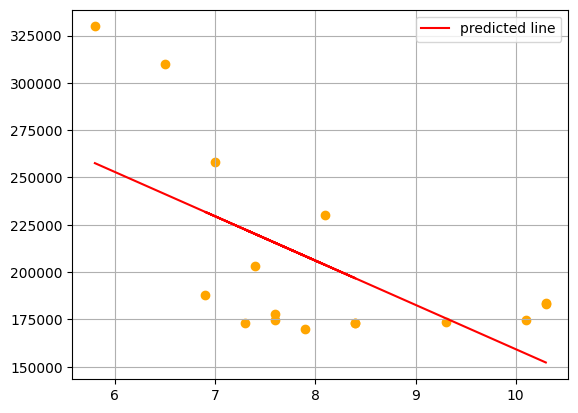

In [33]:
preds = model.predict(sx_train)
plt.scatter(sx_train,sy_train,color="orange")
plt.plot(sx_train,preds,label="predicted line",color="red")
plt.legend()
plt.grid()

# Multi Linear/variable Regression

$$Y = m_1X_1 + m_1X_2 + ... +m_nX_n + c$$
$$$$
$(β = m_1,m_2,m_3,....,c)$
$$$$
$$β = (X.T*X)^{-1}*X.T*Y$$



### Dataset Prep

In [46]:
data2 = pd.read_csv("https://raw.githubusercontent.com/amzker/ML_Algorithm_From_Scratch/main/Regression/chapter_0/datasets/MLinear.csv")

In [47]:
data2

,City,Number of weekly drivers,Price per week,Population of city,Monthly income of drivers,Average parking rates per month
0,1,192000,15,1800000,5800,50
1,2,190400,15,1790000,6200,50
2,3,191200,15,1780000,6400,60
3,4,177600,25,1778000,6500,60
4,5,176800,25,1750000,6550,60
5,6,178400,25,1740000,6580,70
6,7,180800,25,1725000,8200,75
7,8,175200,30,1725000,8600,75
8,9,174400,30,1720000,8800,75
9,10,173920,30,1705000,9200,80


In [49]:
data2.describe()

,City,Number of weekly drivers,Price per week,Population of city,Monthly income of drivers,Average parking rates per month
count,27.000000,27.000000,27.000000,2.700000e+01,27.000000,27.000000
mean,14.000000,160026.074074,49.925926,1.680111e+06,11063.259259,107.037037
std,7.937254,21301.097303,27.627921,6.780307e+04,3416.627944,45.346089
min,1.000000,115696.000000,15.000000,1.590000e+06,5800.000000,50.000000
25%,7.500000,149600.000000,27.500000,1.617500e+06,8400.000000,75.000000
50%,14.000000,161600.000000,40.000000,1.695000e+06,11600.000000,100.000000
75%,20.500000,176000.000000,75.000000,1.725000e+06,13888.000000,140.000000
max,27.000000,192000.000000,102.000000,1.800000e+06,16200.000000,200.000000


In [50]:
data2.corr()

,City,Number of weekly drivers,Price per week,Population of city,Monthly income of drivers,Average parking rates per month
City,1.000000,-0.869455,0.897478,-0.977315,0.994476,0.966017
Number of weekly drivers,-0.869455,1.000000,-0.965953,0.897565,-0.872665,-0.793423
Price per week,0.897478,-0.965953,1.000000,-0.914897,0.896675,0.848981
Population of city,-0.977315,0.897565,-0.914897,1.000000,-0.971268,-0.919019
Monthly income of drivers,0.994476,-0.872665,0.896675,-0.971268,1.000000,0.948526
Average parking rates per month,0.966017,-0.793423,0.848981,-0.919019,0.948526,1.000000


In [51]:
data2.columns

Index(['City ', 'Number of weekly drivers', 'Price per week',
       'Population of city', 'Monthly income of drivers',
       'Average parking rates per month'],
      dtype='object')

In [52]:
# i am dropping this one but you may keep it
data2.drop(columns=["City "],inplace=True) 

mly_train = data2[["Number of weekly drivers","Population of city"]]
mlx_train = data2.drop(columns=["Number of weekly drivers","Population of city"])

In [53]:
class Multireg:
  def __init__(self):
    self.m = None
    self.c = None
    
  
  def addc(self,x):
    c = np.ones((len(x),1)).reshape(-1,1)
    return np.concatenate((c,x),1)

  def fit(self,X,y):
    # adding slope as 1 so it will also gets calculated
    X = self.addc(X)
    slopes = np.dot(np.linalg.inv(np.dot(X.T, X)) , np.dot(X.T, y))
    #slopes = np.linalg.inv(X.T @ X) @ X.T @ y
    self.m = slopes[1:]
    self.c = slopes[0]
  
  def predict(self, X):
    if self.m is None or self.c is None:
        raise ValueError("Model has not been trained yet")
    res = np.dot(X, self.m) + self.c
    return res

  def evaluate(self, x_test, y_test):
      if self.m is None or self.c is None:
          raise ValueError("Model has not been trained yet")

      y_pred = self.predict(x_test)
      mse = ((y_test - y_pred)**2).mean()

      #try to implement rscore and other error by self

      print("MSE:", mse)
      

In [58]:
mmodel = Multireg()
mmodel.fit(mlx_train,mly_train)
mmodel.__dict__

{'m': array([[-719.76514999, -550.4499925 ],
        [  -2.16075229,  -15.64188932],
        [ 154.01983395,   28.45704876]]),
 'c': array([ 203380.15171747, 1877597.1553135 ])}

In [60]:
mmodel.evaluate(mlx_train,mly_train)

MSE: Number of weekly drivers    2.444054e+07
Population of city          2.068717e+08
dtype: float64


In [62]:
from sklearn.metrics import mean_squared_error  as mse
print(mse(mly_train,mmodel.predict(mlx_train)))
from sklearn.linear_model import LinearRegression
smodel = LinearRegression()
smodel.fit(mlx_train,mly_train)
print(smodel.score(mlx_train,mly_train))

115656102.3638261
0.9486667869617014


In [63]:
smodel.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Price per week', 'Monthly income of drivers',
        'Average parking rates per month'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([[-719.76514999,   -2.16075229,  154.01983395],
        [-550.4499925 ,  -15.64188932,   28.45704876]]),
 'rank_': 3,
 'singular_': array([17423.29094948,    73.23351795,    62.34854919]),
 'intercept_': array([ 203380.15171747, 1877597.15531353])}

In [64]:
preds = mmodel.predict(mlx_train)

In [65]:
cm = pd.DataFrame()
cm[["A.weekdriver","A.popu"]] = mly_train
cm[["p.weekdriver","p.popu"]] = preds
cm

,A.weekdriver,A.popu,p.weekdriver,p.popu
0,192000,1800000,187752.302897,1.780040e+06
1,190400,1790000,186888.001982,1.773784e+06
2,191200,1780000,187996.049864,1.770940e+06
3,177600,1778000,180582.323136,1.763871e+06
4,176800,1750000,180474.285521,1.763089e+06
5,178400,1740000,181949.661292,1.762904e+06
6,180800,1725000,179219.341756,1.737707e+06
7,175200,1725000,174756.215091,1.728698e+06
8,174400,1720000,174324.064634,1.725569e+06
9,173920,1705000,174229.862889,1.719455e+06
